## Séries Temporais

In [1]:
!pip install pandas_datareader

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 kB 2.2 MB/s eta 0:00:0031m2.3 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 16.8 MB/s eta 0:00:00 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.0/163.0 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.0/119.0 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.4/121.4 kB 9.9 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import datetime
import pandas as pd
import numpy as np
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline  

In [3]:
style.use('fivethirtyeight')

In [4]:
help(style.use)

Help on function use in module matplotlib.style.core:

use(style)
    Use Matplotlib style settings from a style specification.
    
    The style name of 'default' is reserved for reverting back to
    the default style settings.
    
    .. note::
    
       This updates the `.rcParams` with the settings from the style.
       `.rcParams` not defined in the style are kept.
    
    Parameters
    ----------
    style : str, dict, Path or list
    
        A style specification. Valid options are:
    
        str
            - One of the style names in `.style.available` (a builtin style or
              a style installed in the user library path).
    
            - A dotted name of the form "package.style_name"; in that case,
              "package" should be an importable Python package name, e.g. at
              ``/path/to/package/__init__.py``; the loaded style file is
              ``/path/to/package/style_name.mplstyle``.  (Style files in
              subpackages are likewi

In [5]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [14]:
import yfinance as yf

In [23]:
ptbr = yf.download('MGLU3.SA', start= '2024-07-01')
ptbr

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-07-01,12.02,12.29,11.88,12.14,12.14,16498900
2024-07-02,12.10,12.33,11.95,12.17,12.17,15119100
2024-07-03,12.26,12.73,12.26,12.58,12.58,17333200
2024-07-04,12.85,13.46,12.83,13.18,13.18,23480800
2024-07-05,13.11,13.73,13.06,13.69,13.69,27239900
2024-07-08,13.48,13.59,12.77,12.89,12.89,24871900
2024-07-09,12.90,13.55,12.83,13.51,13.51,16900000
2024-07-10,13.90,14.14,13.42,13.47,13.47,22283100
2024-07-11,13.97,14.04,13.63,13.71,13.71,13490500


In [24]:
type(ptbr)

pandas.core.frame.DataFrame

In [25]:
ptbr.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-07-01,12.02,12.29,11.88,12.14,12.14,16498900
2024-07-02,12.10,12.33,11.95,12.17,12.17,15119100
2024-07-03,12.26,12.73,12.26,12.58,12.58,17333200
2024-07-04,12.85,13.46,12.83,13.18,13.18,23480800
2024-07-05,13.11,13.73,13.06,13.69,13.69,27239900


In [26]:
ptbr['Open']

Date
2024-07-01    12.02
2024-07-02    12.10
2024-07-03    12.26
2024-07-04    12.85
2024-07-05    13.11
2024-07-08    13.48
2024-07-09    12.90
2024-07-10    13.90
2024-07-11    13.97
2024-07-12    13.71
2024-07-15    13.85
2024-07-16    14.29
2024-07-17    13.60
2024-07-18     0.00
Name: Open, dtype: float64

<Axes: xlabel='Date'>

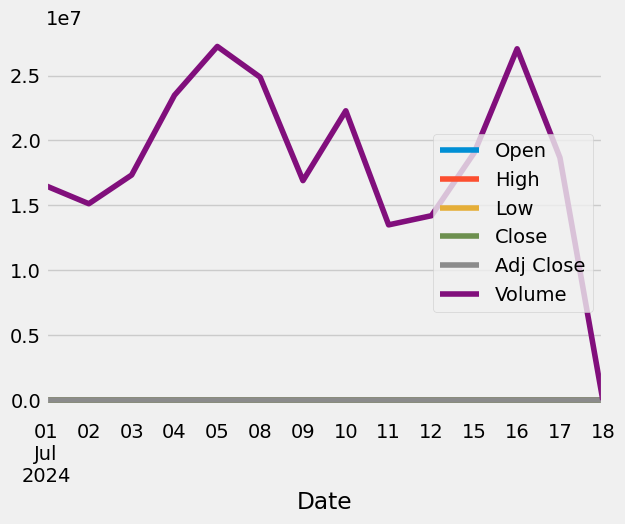

In [27]:
ptbr.plot()

In [28]:
PTBR_final_prices = pd.DataFrame(ptbr['Close'])

In [29]:
PTBR_final_prices

,Close
Date,
2024-07-01,12.14
2024-07-02,12.17
2024-07-03,12.58
2024-07-04,13.18
2024-07-05,13.69
2024-07-08,12.89
2024-07-09,13.51
2024-07-10,13.47
2024-07-11,13.71


In [30]:
PTBR_final_prices.isnull()

,Close
Date,
2024-07-01,False
2024-07-02,False
2024-07-03,False
2024-07-04,False
2024-07-05,False
2024-07-08,False
2024-07-09,False
2024-07-10,False
2024-07-11,False


In [31]:
PTBR_final_prices.notnull()

,Close
Date,
2024-07-01,True
2024-07-02,True
2024-07-03,True
2024-07-04,True
2024-07-05,True
2024-07-08,True
2024-07-09,True
2024-07-10,True
2024-07-11,True


<h3>Operações com Datas</h3>

In [33]:
natal = pd.date_range(2015,12,25)
natal

DatetimeIndex(['1970-01-01 00:00:00.000002015',
               '1970-01-01 00:00:00.000001931',
               '1970-01-01 00:00:00.000001848',
               '1970-01-01 00:00:00.000001764',
               '1970-01-01 00:00:00.000001681',
               '1970-01-01 00:00:00.000001597',
               '1970-01-01 00:00:00.000001514',
               '1970-01-01 00:00:00.000001430',
               '1970-01-01 00:00:00.000001347',
               '1970-01-01 00:00:00.000001263',
               '1970-01-01 00:00:00.000001180',
               '1970-01-01 00:00:00.000001096',
               '1970-01-01 00:00:00.000001013',
               '1970-01-01 00:00:00.000000930',
               '1970-01-01 00:00:00.000000846',
               '1970-01-01 00:00:00.000000763',
               '1970-01-01 00:00:00.000000679',
               '1970-01-01 00:00:00.000000596',
               '1970-01-01 00:00:00.000000512',
               '1970-01-01 00:00:00.000000429',
               '1970-01-01 00:00:00.0000

In [34]:
boxingDay = natal + pd.DateOffset(days = 1)
boxingDay

DatetimeIndex(['1970-01-02 00:00:00.000002015',
               '1970-01-02 00:00:00.000001931',
               '1970-01-02 00:00:00.000001848',
               '1970-01-02 00:00:00.000001764',
               '1970-01-02 00:00:00.000001681',
               '1970-01-02 00:00:00.000001597',
               '1970-01-02 00:00:00.000001514',
               '1970-01-02 00:00:00.000001430',
               '1970-01-02 00:00:00.000001347',
               '1970-01-02 00:00:00.000001263',
               '1970-01-02 00:00:00.000001180',
               '1970-01-02 00:00:00.000001096',
               '1970-01-02 00:00:00.000001013',
               '1970-01-02 00:00:00.000000930',
               '1970-01-02 00:00:00.000000846',
               '1970-01-02 00:00:00.000000763',
               '1970-01-02 00:00:00.000000679',
               '1970-01-02 00:00:00.000000596',
               '1970-01-02 00:00:00.000000512',
               '1970-01-02 00:00:00.000000429',
               '1970-01-02 00:00:00.0000

In [19]:
boxingDay + pd.DateOffset(weeks = 1)

Timestamp('2016-01-02 00:00:00')

In [20]:
boxingDay + 2 * pd.DateOffset(years = 2, months = 6)

Timestamp('2020-12-26 00:00:00')

In [21]:
lastDay = pd.datetime(2016,12,31)

In [22]:
from pandas.tseries.offsets import QuarterBegin

In [23]:
dtoffset = QuarterBegin()
lastDay + dtoffset

Timestamp('2017-03-01 00:00:00')

In [24]:
firstQuarterLastDay = pd.datetime(2015,3,31)

In [25]:
dtoffset.rollforward(firstQuarterLastDay)

Timestamp('2015-06-01 00:00:00')

In [38]:
today = datetime.date.today()
today

datetime.date(2024, 7, 18)

<b> 1 semana a partir de hoje</b>

In [39]:
today + pd.DateOffset(weeks = 1)

Timestamp('2024-07-25 00:00:00')

<b>5 anos a partir de hoje</b>

In [40]:
today + 2 * pd.DateOffset(years = 2, months = 6)

Timestamp('2029-07-18 00:00:00')

<h3>Conversão entre tipos de dados para Séries Temporais</h3>

In [29]:
worldCupFinal = pd.to_datetime('07/13/2015')
worldCupFinal

Timestamp('2015-07-13 00:00:00')

In [30]:
worldCupFinal.to_period('D')

Period('2015-07-13', 'D')

In [31]:
worldCupKickoff=pd.Period('06/12/2015','D')
worldCupKickoff

Period('2015-06-12', 'D')

In [32]:
worldCupKickoff.to_timestamp()

Timestamp('2015-06-12 00:00:00')

In [33]:
worldCupDays=pd.date_range('06/12/2014', periods = 32, freq = 'D')
worldCupDays

DatetimeIndex(['2014-06-12', '2014-06-13', '2014-06-14', '2014-06-15',
               '2014-06-16', '2014-06-17', '2014-06-18', '2014-06-19',
               '2014-06-20', '2014-06-21', '2014-06-22', '2014-06-23',
               '2014-06-24', '2014-06-25', '2014-06-26', '2014-06-27',
               '2014-06-28', '2014-06-29', '2014-06-30', '2014-07-01',
               '2014-07-02', '2014-07-03', '2014-07-04', '2014-07-05',
               '2014-07-06', '2014-07-07', '2014-07-08', '2014-07-09',
               '2014-07-10', '2014-07-11', '2014-07-12', '2014-07-13'],
              dtype='datetime64[ns]', freq='D')

In [34]:
worldCupDays.to_period()

PeriodIndex(['2014-06-12', '2014-06-13', '2014-06-14', '2014-06-15',
             '2014-06-16', '2014-06-17', '2014-06-18', '2014-06-19',
             '2014-06-20', '2014-06-21', '2014-06-22', '2014-06-23',
             '2014-06-24', '2014-06-25', '2014-06-26', '2014-06-27',
             '2014-06-28', '2014-06-29', '2014-06-30', '2014-07-01',
             '2014-07-02', '2014-07-03', '2014-07-04', '2014-07-05',
             '2014-07-06', '2014-07-07', '2014-07-08', '2014-07-09',
             '2014-07-10', '2014-07-11', '2014-07-12', '2014-07-13'],
            dtype='int64', freq='D')

<h2>Plot com Matplotlib</h2>

In [35]:
import numpy as np

In [36]:
X = np.linspace(-np.pi, np.pi, 256, endpoint = True)

In [37]:
f,g = np.cos(X) + np.sin(X), np.sin(X) - np.cos(X)

In [38]:
f_serie = pd.Series(f)
g_serie = pd.Series(g)

In [39]:
plotDF = pd.concat([f_serie, g_serie], axis = 1)
plotDF.index = X
plotDF.columns = ['sin(x)+cos(x)','sin(x)-cos(x)']
plotDF.head()

,sin(x)+cos(x),sin(x)-cos(x)
-3.141593,-1.000000,1.000000
-3.116953,-1.024334,0.975059
-3.092313,-1.048046,0.949526
-3.067673,-1.071122,0.923417
-3.043033,-1.093547,0.896747


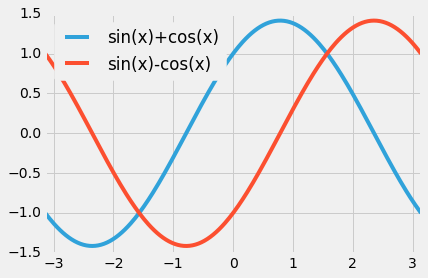

In [40]:
plotDF.plot()
plt.show()

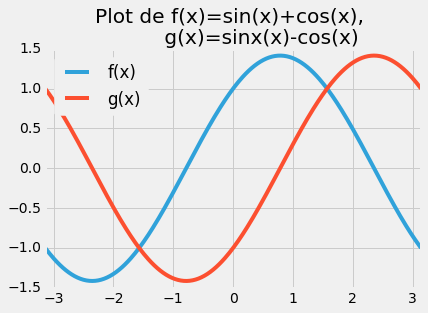

In [41]:
plotDF.columns = ['f(x)','g(x)']
plotDF.plot(title = 'Plot de f(x)=sin(x)+cos(x), \n         g(x)=sinx(x)-cos(x)')
plt.show()

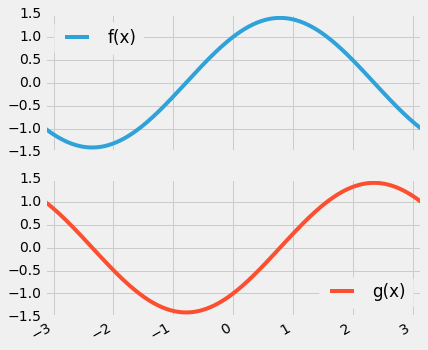

In [42]:
# Subplots
plotDF.plot(subplots = True, figsize = (6,6))
plt.show()